In [1]:
import igraph as ig
import geopandas as gpd
import itertools as it

from eptnr.data_generation.utils.synthetic_data_generation import (
    graph_walking_edges_generation,
    set_eptnr_vertices,
    graph_edge_entry,
)
from eptnr.data_generation.utils.eptnr_vertex import EPTNRVertex
from eptnr.constants.igraph_edge_types import IGraphEdgeTypes
from eptnr.constants.igraph_vertex_types import IGraphVertexTypes
from eptnr.constants.igraph_colors import IGraphColors
from eptnr.data_generation.utils.synthetic_speeds import SyntheticTravelSpeeds

# Graph

In [2]:
g = ig.Graph(directed=True)

In [3]:
vertices = [
    # Residential Centers
    EPTNRVertex(0, 0, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(3, 0, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(3, 3, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(0, 3, IGraphColors.RED, IGraphVertexTypes.RC_NODE),

    # Public Transport Nodes
    EPTNRVertex(0.2, 0.2, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(2.8, 0.2, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(2.8, 2.8, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(0.2, 2.8, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),

    # Point of Interest Nodes
    EPTNRVertex(0.3, 0.3, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(2.7, 0.3, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(2.7, 2.7, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(0.3, 2.7, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
]
set_eptnr_vertices(graph=g, vertices=vertices)


## PTN Edges

### Walking

In [4]:
graph_walking_edges_generation(graph=g, vertices=vertices)


### PT

In [5]:
E_RAIL = [
    (vertices[4],vertices[5]),  # Train_line_1
    (vertices[5],vertices[6]),  # Train_line_1
    (vertices[7],vertices[6]),  # Train_line_2,
    (vertices[7],vertices[4]),  # Train_line_2
]
names = list(it.repeat(f'Train_line_1',2)) + list(it.repeat(f'Train_line_2',2))

graph_edge_entry(
    graph=g,
    edges=E_RAIL,
    names=names,
    speed=SyntheticTravelSpeeds.RAIL_SPEED,
    edge_type=IGraphEdgeTypes.RAIL,
    color=IGraphColors.PINK,
    round_to_decimals=2,
)


In [6]:
g.es['active'] = 1

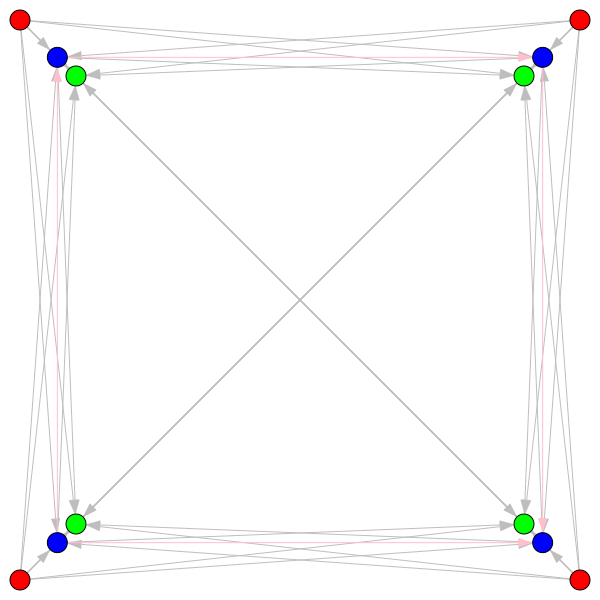

In [7]:
ig.plot(g)

In [8]:
g.write_picklez('../datasets/synthetic_2/graph.picklez')

# Census Data

In [9]:
rc_vertices = vertices[0:4]
data = {
    'neighborhood': [v.name for v in rc_vertices],
    'n_inh': [1000,1000,1000,1000],
    'n_purple': [500, 500, 500, 500],
    'n_red':    [500, 500, 500, 500],
    'res_centroids': gpd.points_from_xy([v.x for v in rc_vertices], [v.y for v in rc_vertices])
}

gdf = gpd.GeoDataFrame(data, geometry='res_centroids')
gdf

,neighborhood,n_inh,n_purple,n_red,res_centroids
0,RC0,1000,500,500,POINT (0.00000 0.00000)
1,RC1,1000,500,500,POINT (3.00000 0.00000)
2,RC2,1000,500,500,POINT (3.00000 3.00000)
3,RC3,1000,500,500,POINT (0.00000 3.00000)


In [10]:
gdf.to_file('../datasets/synthetic_2/census_data.geojson', driver='GeoJSON')